<a href="https://colab.research.google.com/github/wander-asb/Repositorio-de-estudos/blob/main/Risco_credito.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [39]:
import pandas                  as pd
import numpy                   as np
import graphviz 


from sklearn.tree          import DecisionTreeClassifier, export_graphviz


from google.colab import drive

In [29]:
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [30]:
_path = '/content/gdrive/MyDrive/Colab Notebooks/Credito_risco_DSA/credito.csv'
df_credito = pd.read_csv(_path)
df_credito.shape

(1000, 17)

## Pré-processamento dos dados

In [31]:
df_credito.head(12)

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,other_credit,housing,existing_loans_count,job,dependents,phone,default
0,< 0 DM,6,critical,furniture/appliances,1169,unknown,> 7 years,4,4,67,none,own,2,skilled,1,yes,no
1,1 - 200 DM,48,good,furniture/appliances,5951,< 100 DM,1 - 4 years,2,2,22,none,own,1,skilled,1,no,yes
2,unknown,12,critical,education,2096,< 100 DM,4 - 7 years,2,3,49,none,own,1,unskilled,2,no,no
3,< 0 DM,42,good,furniture/appliances,7882,< 100 DM,4 - 7 years,2,4,45,none,other,1,skilled,2,no,no
4,< 0 DM,24,poor,car,4870,< 100 DM,1 - 4 years,3,4,53,none,other,2,skilled,2,no,yes
5,unknown,36,good,education,9055,unknown,1 - 4 years,2,4,35,none,other,1,unskilled,2,yes,no
6,unknown,24,good,furniture/appliances,2835,500 - 1000 DM,> 7 years,3,4,53,none,own,1,skilled,1,no,no
7,1 - 200 DM,36,good,car,6948,< 100 DM,1 - 4 years,2,2,35,none,rent,1,management,1,yes,no
8,unknown,12,good,furniture/appliances,3059,> 1000 DM,4 - 7 years,2,4,61,none,own,1,unskilled,1,no,no
9,1 - 200 DM,30,critical,car,5234,< 100 DM,unemployed,4,2,28,none,own,2,management,1,no,yes


### Transformação dos dados categóricos 

In [32]:
for col_name in df_credito.columns:
    if(df_credito[col_name].dtype == 'object'):
        df_credito[col_name]= df_credito[col_name].astype('category')
        df_credito[col_name] = df_credito[col_name].cat.codes.astype('int64')

In [36]:
df_credito.dtypes

checking_balance        int64
months_loan_duration    int64
credit_history          int64
purpose                 int64
amount                  int64
savings_balance         int64
employment_duration     int64
percent_of_income       int64
years_at_residence      int64
age                     int64
other_credit            int64
housing                 int64
existing_loans_count    int64
job                     int64
dependents              int64
phone                   int64
default                 int64
dtype: object

In [37]:
df_credito.head()

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,other_credit,housing,existing_loans_count,job,dependents,phone,default
0,1,6,0,4,1169,4,3,4,4,67,1,1,2,1,1,1,0
1,0,48,1,4,5951,2,0,2,2,22,1,1,1,1,1,0,1
2,3,12,0,3,2096,2,1,2,3,49,1,1,1,3,2,0,0
3,1,42,1,4,7882,2,1,2,4,45,1,0,1,1,2,0,0
4,1,24,3,1,4870,2,0,3,4,53,1,0,2,1,2,0,1


In [38]:
df_credito.tail()

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,other_credit,housing,existing_loans_count,job,dependents,phone,default
995,3,12,1,4,1736,2,1,3,4,31,1,1,1,3,1,0,0
996,1,30,1,1,3857,2,0,4,4,40,1,1,1,0,1,1,0
997,3,12,1,4,804,2,3,4,4,38,1,1,1,1,1,0,0
998,1,45,1,4,1845,2,0,4,4,23,1,0,1,1,1,1,1
999,0,45,0,1,4576,0,4,3,4,27,1,1,1,1,1,0,0


### Seperação dos dados de treino e teste

In [34]:
X = df_credito.drop('default', axis =1)
y = df_credito[['default']]

In [35]:
decision = DecisionTreeClassifier(max_depth=5)
decision.fit(X, y)

DecisionTreeClassifier(max_depth=5)

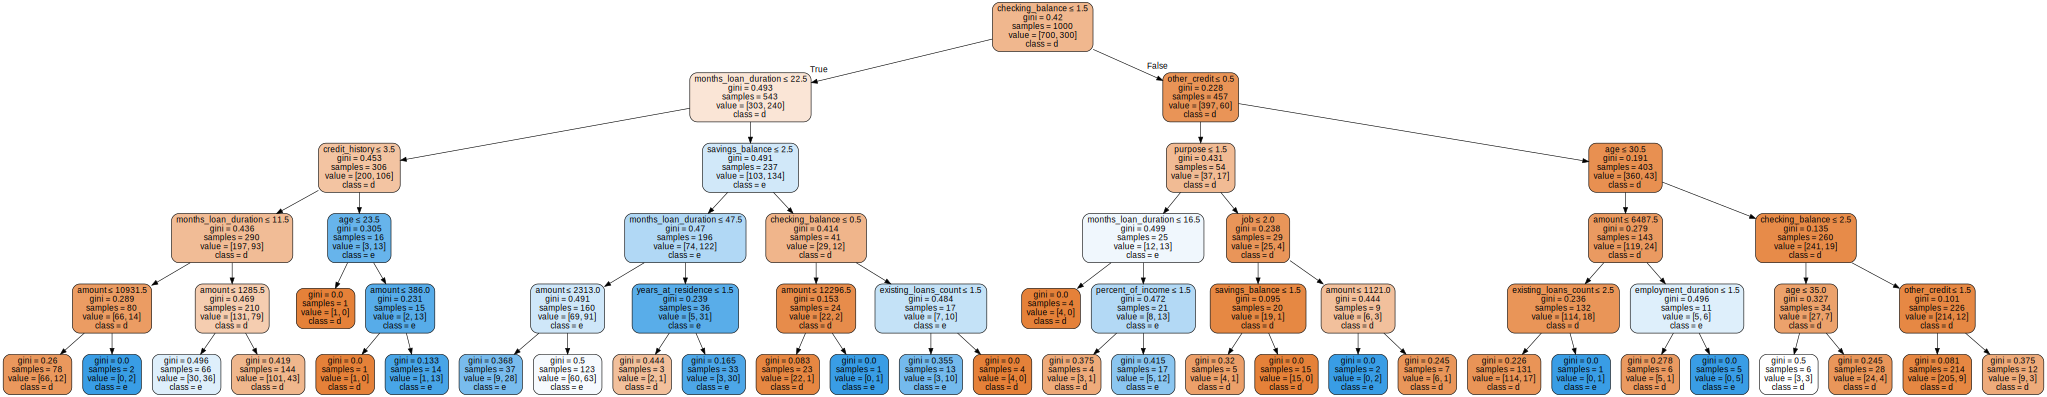

In [46]:
feature_names = df_credito.drop('default', axis = 1).columns
target_name = 'default'

dot_data = export_graphviz(decision, out_file=None, 
                     feature_names=feature_names,  
                      class_names=target_name,  
                     filled=True, rounded=True,  
                     special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 